In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

2025-01-22 12:06:34.454001: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-22 12:06:34.454682: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-22 12:06:34.456536: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-22 12:06:34.462183: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737527794.471828  156318 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737527794.47

In [2]:
# Load the Boston dataset
boston = tf.keras.datasets.boston_housing
boston_data = boston.load_data()
# Split the data into training and testing sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)
# Standardize the features (Important for Neural Networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [3]:
# Create a DataFrame for the training data
# Column names based on the Boston Housing dataset features
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", 
    "TAX", "PTRATIO", "BZN", "LSTAT"
]
df_train = pd.DataFrame(x_train, columns=columns)

# Add the target variable 'PRICE' to the DataFrame
df_train["MEDV"] = y_train
df = pd.DataFrame(df_train, columns=columns)
corr = df.corr()
corr.shape

(13, 13)

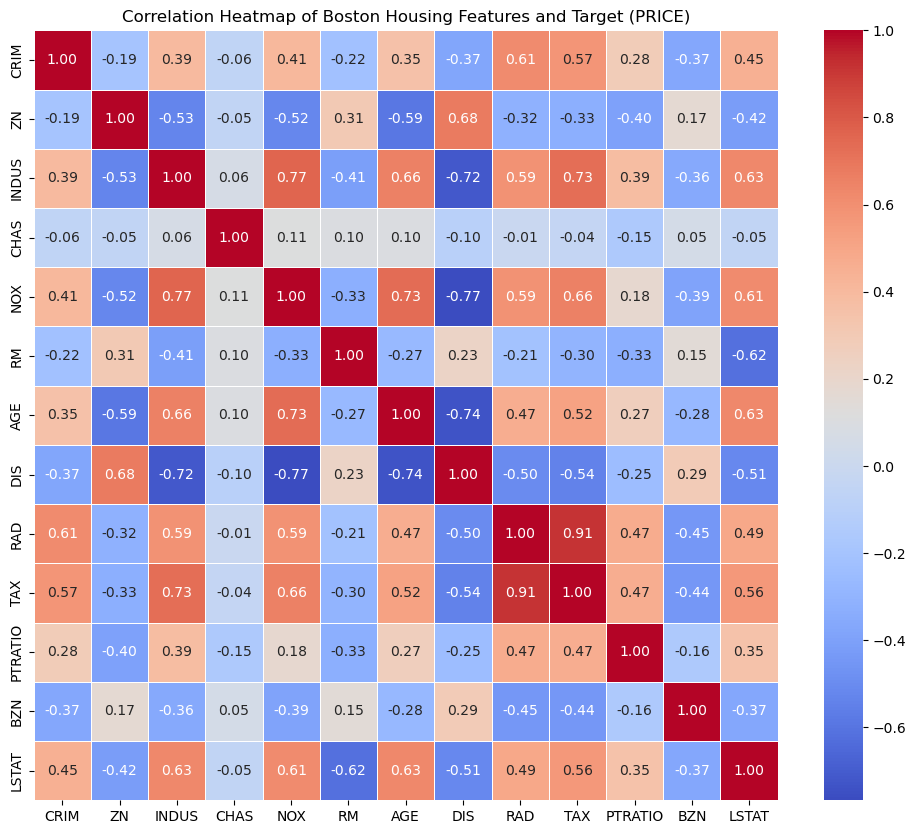

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Boston Housing Features and Target (PRICE)')
plt.show()

In [5]:
# Initialize the Sequential model
model = Sequential()

# Add input layer (features from the dataset) and one hidden layer
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with ReLU
model.add(Dense(units=32, activation='relu'))  # Another hidden layer with ReLU
model.add(Dense(units=1))  # Output layer (single value prediction)

# Compile the model with Mean Squared Error loss and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

2025-01-22 12:06:36.014549: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# Train the model
model.fit(X_train, y_train, epochs=495, batch_size=32, verbose=1)


Epoch 1/495
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 551.4883  
Epoch 2/495
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 542.2067 
Epoch 3/495
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 523.4227 
Epoch 4/495
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 458.5642 
Epoch 5/495
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 363.5446 
Epoch 6/495
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 278.2172 
Epoch 7/495
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 174.4381 
Epoch 8/495
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119.4744 
Epoch 9/495
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70.4838 
Epoch 10/495
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.1204 
Epoch 11/495
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.4328 
Epoch 12/495
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.2868 
Epoch 13/495
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.5483 
Epoch 14/495
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.2124 
Epoch 15/495
13/13 ━━━━━━━━━━━━━━━

In [7]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss (Mean Squared Error): {test_loss}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9524 
Test Loss (Mean Squared Error): 12.31801986694336


In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Print some predictions alongside the true values
for true, pred in zip(y_test[:10], y_pred[:10]):
    print(f"True value: {true:.2f}, Predicted value: {pred[0]:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
True value: 22.40, Predicted value: 23.71
True value: 28.60, Predicted value: 28.15
True value: 19.50, Predicted value: 18.36
True value: 24.80, Predicted value: 26.09
True value: 24.50, Predicted value: 23.74
True value: 21.40, Predicted value: 21.41
True value: 33.10, Predicted value: 32.83
True value: 22.90, Predicted value: 23.33
True value: 20.70, Predicted value: 24.37
True value: 24.10, Predicted value: 21.47


In [9]:
from sklearn.metrics import r2_score
print("R2 Score", r2_score(y_test,y_pred))

R2 Score 0.8269989990810254


In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error
import numpy as np
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 2.441544522491156
MSE: 12.3180192960874
RMSE: 3.50970359091582


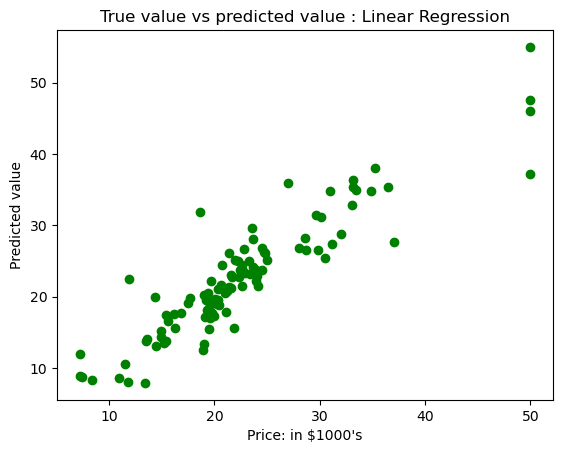

In [11]:
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()